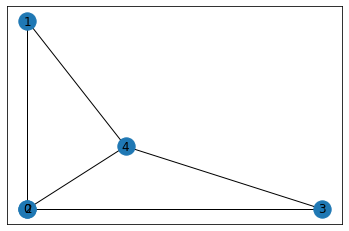

In [2]:
import networkx as nx
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
import random

#intput: a grpah as a dictionary
#output: a list of lists of vertices in the grpah which share neighbors
# def same_neighbors(graph):
# 	same_neighbors = []
# 	for u in graph:
# 		same_neighbors_u = [u]
# 		for v in graph:
# 			if v != u:
# 				if set(graph[u]) == set(graph[v]):
# 					same_neighbors_u.append(v)
# 		if len(same_neighbors_u) > 1:
# 			same_neighbors.append(same_neighbors_u)
# 	same_neighbors = [set(x) for x in same_neighbors]
# 	same = []
# 	for i in same_neighbors:
# 		if i not in same:
# 			same.append(i)
# 	same = [list(x) for x in same]
# 	return same
 
#input: a graph in the form of a dictionary and an outter_face in the form of a list of vertices.
def tutte_embedding(graph, outter_face):
	pos = {} #a dictionary of node positions
	tmp = nx.Graph()
	for edge in outter_face:
		a,b = edge
		tmp.add_edge(a,b)
	tmp_pos = nx.spectral_layout(tmp) #ensures that outterface is a convex shape
	pos.update(tmp_pos)
	outter_vertices = tmp.nodes()
	remaining_vertices = [x for x in graph.nodes() if x not in outter_vertices]

	size = len(remaining_vertices)
	A = [[0 for i in range(size)] for i in range(size)] #create the the system of equations that will determine the x and y positions of remaining vertices
	b = [0 for i in range(size)] #the elements of theses matrices are indexed by the remaining_vertices list
	C = [[0 for i in range(size)] for i in range(size)]
	d = [0 for i in range(size)]
	for u in remaining_vertices:
		i = remaining_vertices.index(u)
		neighbors = graph.neighbors(u)
		n = len(list(neighbors))
		A[i][i] = 1
		C[i][i] = 1
		for v in neighbors:
			if v in outter_vertices:
				b[i] += float(pos[v][0])/n
				d[i] += float(pos[v][1])/n
			else:
				j = remaining_vertices.index(v)
				A[i][j] = -(1/float(n))
				C[i][j] = -(1/float(n))

	x = np.linalg.solve(A, b)
	y = np.linalg.solve(C, d)
	for u in remaining_vertices:
		i = remaining_vertices.index(u)
		pos[u] = [x[i],y[i]]

	return pos


diamond1 = np.matrix([[0,1,1,1,0],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[0,1,1,1,0]])
G = nx.from_numpy_matrix(diamond1)
pos = tutte_embedding(G, [ (2,0),(0,2), (3,-1), (-3,1)])
nx.draw_networkx(G, pos=pos)
# plt.show()
# print(pos)

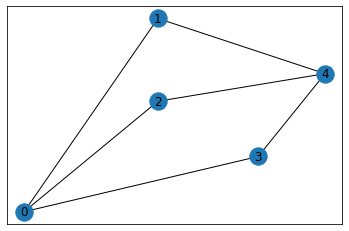

In [23]:
nx.draw_networkx(G,
                 pos={2: np.array([-0.5, -0.5]),
                  0: np.array([-2.5, -2.5]), 
                  3: np.array([ 1. , -1.5]),  
                  1: np.array([-0.5,  1. ]), 
                  4:np.array( [2.0, 0.0])})